In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [17]:
amazon = pd.read_csv('amazon.csv',encoding= 'latin1')

In [18]:
amazon.head(10)


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


# Change Portuguese month to English month


In [20]:
def new_month(old, new_m):
    amazon.month.replace(old, new_m,inplace=True)

new_month('Janeiro', 'January')
new_month('Fevereiro', 'February')
new_month('Março', 'March')
new_month('Abril', 'April')
new_month('Maio', 'May')
new_month('Junho', 'June')
new_month('Julho', 'July')
new_month('Agosto', 'August')
new_month('Setembro', 'September')
new_month('Outubro', 'October')
new_month('Novembro', 'November')
new_month('Dezembro', 'December')

In [21]:
amazon.head(10)


,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
5,2003,Acre,January,10.0,2003-01-01
6,2004,Acre,January,0.0,2004-01-01
7,2005,Acre,January,12.0,2005-01-01
8,2006,Acre,January,4.0,2006-01-01
9,2007,Acre,January,0.0,2007-01-01


In [22]:
amazon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [23]:
amazon.describe()


,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [24]:
amazon['number'] = amazon['number'].apply(np.round)


In [25]:
amazon['year'].min()


1998

In [26]:
amazon['year'].max()


2017

# Find total fire in Acre State


In [28]:
acre_fires = sum(amazon[amazon['state'] == 'Acre']['number'])
print("Number of fires in Acre state are {}".format(acre_fires))

Number of fires in Acre state are 18463.0


In [29]:
acre_fires_year = amazon[amazon['state'] == 'Acre'].groupby('year').sum()


In [30]:
acre_fires_year.head(5)


,number
year,
1998,730.0
1999,333.0
2000,434.0
2001,828.0
2002,1544.0


In [31]:
acre_fires_year.reset_index(inplace=True)
acre_fires_year.head()

,year,number
0,1998,730.0
1,1999,333.0
2,2000,434.0
3,2001,828.0
4,2002,1544.0


# Per year fire graph of acre state


<AxesSubplot:xlabel='year', ylabel='number'>

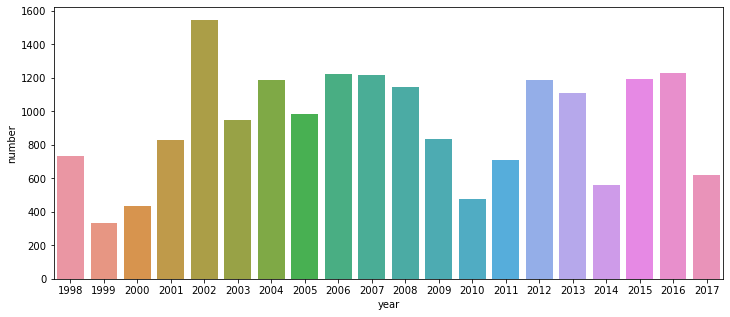

In [33]:
fig = plt.figure(figsize=(12,5))
sns.barplot(x='year',y='number',data=acre_fires_year)

# Total Fire in all state


In [35]:
amazon_total_fires = amazon.groupby('state')['number'].sum().to_frame().reset_index().sort_values(by=['number'],ascending=False)


In [36]:
amazon_total_fires.head()


,state,number
10,Mato Grosso,96238.0
12,Paraiba,52435.0
20,Sao Paulo,51121.0
16,Rio,45160.0
4,Bahia,44745.0


# Barplot to analyze


<AxesSubplot:xlabel='state', ylabel='number'>

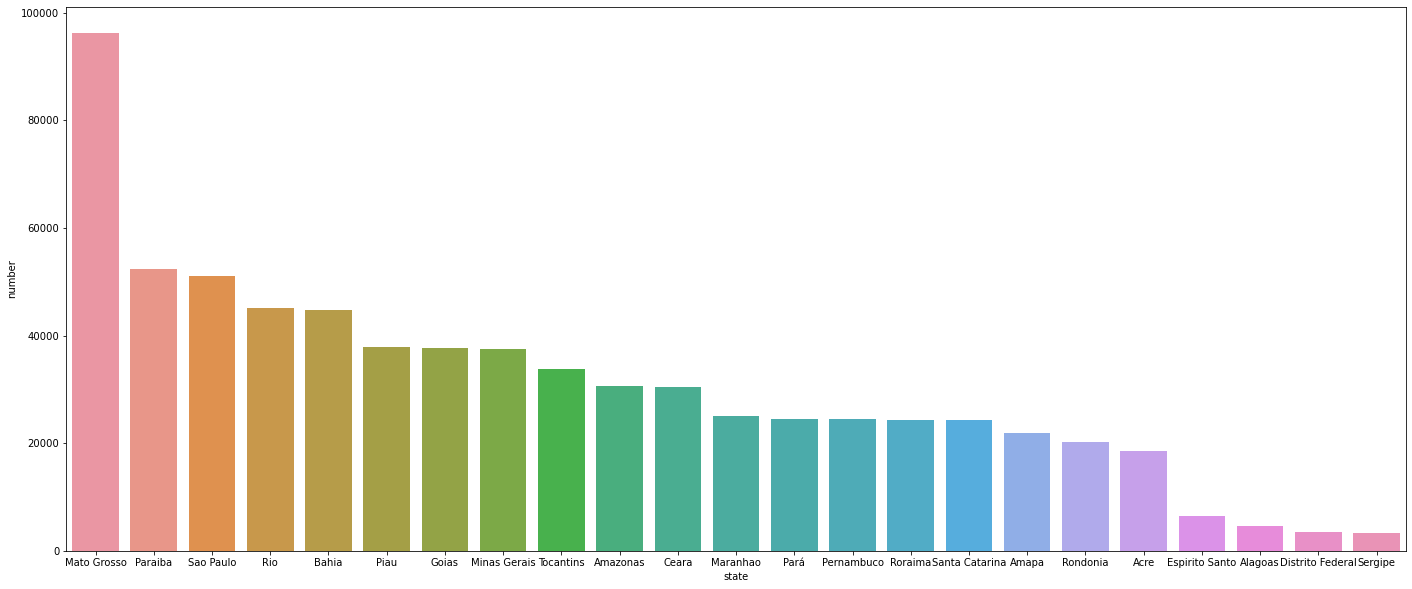

In [38]:
fig = plt.figure(figsize=(24,10))
sns.barplot(x='state',y='number',data=amazon_total_fires)

# Bargrapgh to analyze fire according to month


<AxesSubplot:xlabel='month', ylabel='number'>

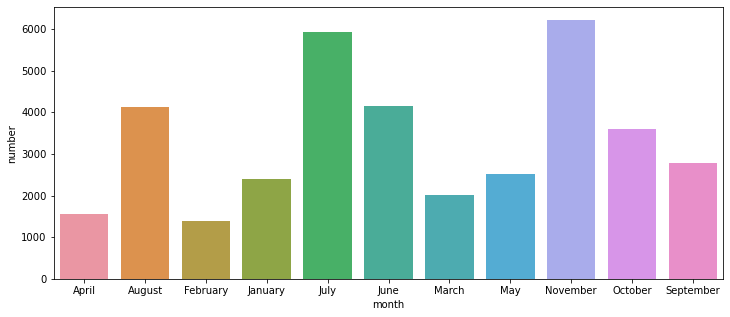

In [40]:
total_fires_2017 = amazon[amazon['year'] == 2017][['number','month']].groupby('month').sum().reset_index()

fig = plt.figure(figsize=(12,5))
sns.barplot(x='month',y='number',data=total_fires_2017)

In [41]:
# Conclusion drwan from the above plot:

# 1. February, March, April and May see the lowest number of forest fires
# 2. A sudden spike in June continuing till November
# 3. July, August, October and November are the 4 months where maximum forest fires happen

# Average fire


In [43]:
avg_fires = amazon['number'].mean()


In [44]:
avg_fires


108.28819336845368

# Find most affected state by fire


In [46]:
by_state = amazon.groupby(['state'], as_index=False).sum()


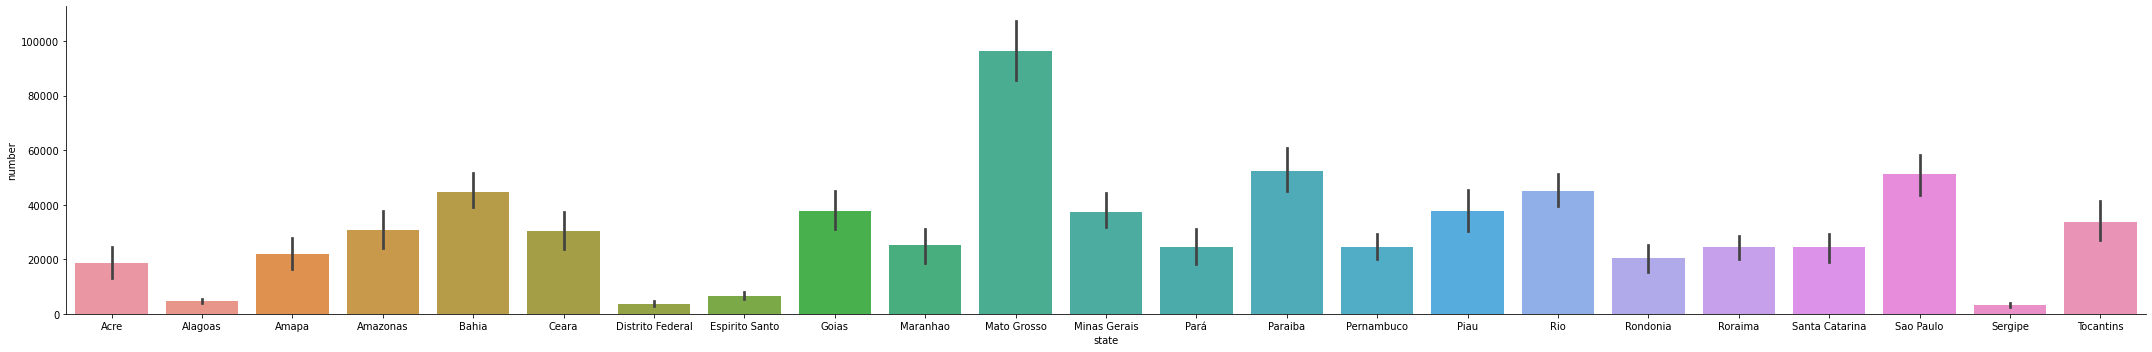

In [47]:
sns.catplot(x='state', y='number', data=amazon[['state','number']], kind='bar', aspect=6, estimator=sum);


In [48]:
# Conclusion drawn from the above plot:

# 1. Mato Grosso see a huge number of forest fires
# 2. Sergipe, Distrito Federal, Alagoas and Espirito Santo see the lowest number of forest fires

# Top 3 Worst states hit

In [50]:
worst_hit = by_state[by_state['number']> by_state['number'].mean() +by_state['number'].std()]
print('Worst states hit: ')
for i in range(len(worst_hit)):
    print(worst_hit['state'].values[i])

Worst states hit: 
Mato Grosso
Paraiba
Sao Paulo


# Analyze on Mato Grosso


In [52]:
Mato_Data = amazon.loc[amazon['state']=='Mato Grosso']


In [53]:
Mato_Data_year = Mato_Data.groupby('year').sum()

Mato_Data_year['year'] = Mato_Data_year.index

Mato_Data_year.index = range(Mato_Data_year.shape[0])

Mato_Data_year = Mato_Data_year.sort_values('year')

Mato_Data_year.head(5)

,number,year
0,2401.0,1998
1,2979.0,1999
2,3896.0,2000
3,3088.0,2001
4,3665.0,2002


# which month is most likely to have a forest fire in Mato state


In [55]:
Mato_Data_month = Mato_Data.groupby('month').sum().sort_values(by=['number'],ascending=False)

Mato_Data_month['month'] = Mato_Data_month.index

Mato_Data_month.index = range(Mato_Data_month.shape[0])

Mato_Data_month.head(5)

,year,number,month
0,80300,10480.0,January
1,80300,10166.0,November
2,80300,10158.0,May
3,80300,9953.0,April
4,80300,9922.0,October


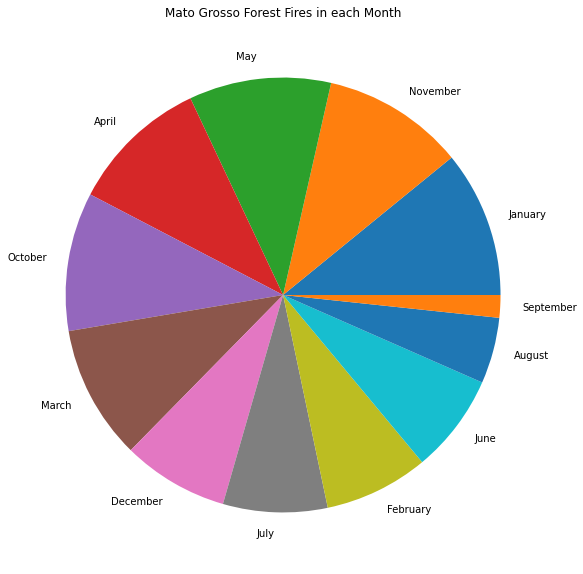

In [56]:
figure = plt.figure(figsize=(10,10))
plt.title('Mato Grosso Forest Fires in each Month')
plt.pie(Mato_Data_month['number'], labels=Mato_Data_month['month'])
plt.show()

# Lineplot for all States


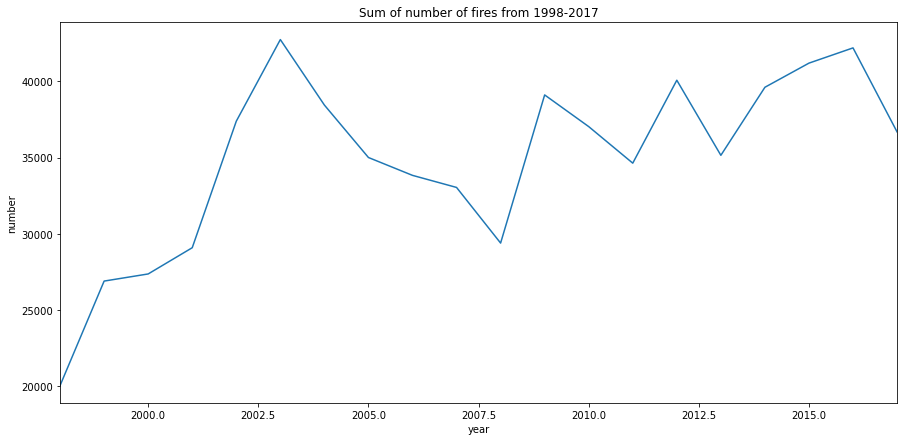

In [58]:
by_year = amazon.groupby(['year'], as_index=False).sum()

plt.figure(figsize=[15,7])
plt.xlim([1998, 2017])
plt.title('Sum of number of fires from 1998-2017')
sns.lineplot(x='year', y='number',data=by_year);

In [59]:
# Fires increased dramatically in the last 20 years, from 20,000 in 1998 to almost double in 2017. 
# What's also alarming is that there is also an increasing trend in the data, 
# so we can expect even more wildfires in the years to follow.

# 2003 and 2016 had the most wildfires throughout Brazil.


# Polynomial equation:- using poly1d and polyfit to fit data in polynomial function


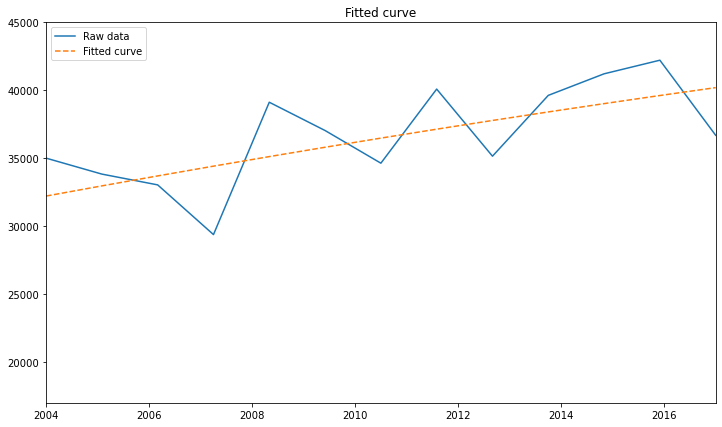

In [61]:
by_year = by_year[by_year['year']>2004]
z = np.poly1d(np.polyfit(by_year['year'],by_year['number'],2))

years = np.linspace(2004, 2017, 13)

plt.figure(figsize=(12,7))
plt.plot(years, by_year['number'], '-', label='Raw data')
plt.plot(years,z(years), '--', label='Fitted curve')
plt.xlim(2004, 2017)
plt.ylim(17000, 45000)
plt.title('Fitted curve')
plt.legend()
plt.show()

# Use Equation from above in For loop to predict the fire in upcoming Year


In [63]:
for i in range (2018,2025):
    print(i, '-',math.trunc(z(i)))

2018 - 40714
2019 - 41224
2020 - 41721
2021 - 42205
2022 - 42676
2023 - 43134
2024 - 43579


In [66]:
# Conclution from above is that the prediction states 41721 in 2020 and if we actually check in google with Amazon forest fire
# in 2020 we get approx 44000, so prdiction is partially correct.